In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Decision-Tree for Regression

In regression, the target variable is continuous. In other words, the output of your model is a real value.

#### Auto-mpg Dataset

Let's motivate our discussion of regression by introducing the automobile miles-per-gallon dataset from the UCI Machine Learning Repository. This dataset consists of 6 features corresponding to the characteristics of a car and a continuous target variable labeled mpg which stands for miles-per-gallon. 

Our task is to predict the mpg consumption of a car given these six features.

In [2]:
df = pd.read_csv("auto.csv")

In [3]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
X = df.drop(["mpg", "origin"], axis = 1)

In [5]:
y = df["mpg"]

First, import train_test_split() from sklearn-dot-model_selection and mean_squared_error as MSE() from sklearn-dot-metrics. Then, split the data into 80%-train and 20%-test using train_test_split.

In [6]:
from sklearn.model_selection import train_test_split

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

#### Regression-Tree in scikit-learn

Let's see how you can train a decision tree with scikit-learn to solve this regression problem. Import DecisionTreeRegressor from sklearn-dot-tree.  

In [8]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

Instantiate the DecisionTreeRegressor() with a maximum depth of 8 by setting the parameter max_depth to 8. In addition, set the parameter min_sample_leaf to 0.13 to impose a stopping condition in which each leaf has to contain at least 13% of the training data.

In [9]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)


Now fit dt to the training set and predict the test set labels. 

In [10]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [11]:
# Compute y_pred
y_pred = dt.predict(X_test)


####  Information Criterion for Regression-Tree

Here, it's important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the mean-squared error of the targets in that node. This means that the regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.

To evaluate the test set performance, we'll use the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [12]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)


In [13]:
# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)


In [14]:
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.47


#### Linear regression vs regression tree

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)


In [16]:
# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.01
Regression Tree test set RMSE: 4.47


#### Supervised Learning - Under the Hood

In supervised learning, you make the assumption that there's a mapping f between features and labels. You can express this as y=f(x). f which is an unknown function that you want to determine. In reality, data generation is always accompanied with randomness or noise.

#### Goals of Supervised Learning

Your goal is to find a model f'(f' can be Logistic Regression, Decision Tree, Neural Network etc.), that best approximates f. When training f', you want to make sure that noise is discarded as much as possible. At the end, f' should achieve a low predictive error on unseen datasets.

#### Difficulties in Approximating f

You may encounter two difficulties when approximating f. 

The first is overfitting, it's when f' fits the noise in the training set. 

The second is underfitting, it's when f' is not flexible enough to approximate f.

#### Overfitting

When a model overfits the training set, its predictive power on unseen datasets is pretty low. In such cases, The model memorizes the noise present in the training set. Such model achieves a low training set error and a high test set error.

#### Underfitting

When a model underfits the data the training set error is roughly equal to the test set error. However, both errors are relatively high. Now the trained model isn't flexible enough to capture the complex dependency between features and labels.

#### Generalization Error

The generalization error of a model tells you how much it generalizes on unseen data. It can be decomposed into 3 terms: bias, variance and irreducible error where the irreducible error is the error contribution of noise.


#### Bias(accurate)

The bias term tells you, on average, how much f' and f are different. In this case, the model is not flexible enough to approximate the true function f . High bias models lead to underfitting.

#### Variance(precise)

The variance term tells you how much f' is inconsistent over different training sets. in this case, f' follows the training data points so closely that it misses the true function f . High variance models lead to overfitting.

#### Model Complexity

The complexity of a model sets its flexibility to approximate the true function f. For example: increasing the maximum-tree-depth increases the complexity of a decision tree.

#### Bias-Variance Tradeoff

When the model complexity increases, the variance increases while the bias decreases. 

Conversely, when model complexity decreases, variance decreases and bias increases. 

Your goal is to find the model complexity that achieves the lowest generalization error. Since this error is the sum of three terms with the irreducible error being constant, you need to find a balance between bias and variance because as one increases the other decreases. This is known as the bias-variance trade-off.

for example, As the complexity of f' increases, the bias term decreases while the variance term increases.

####  Estimating the Generalization Error

Given that you've trained a supervised machine learning model labeled f', how do you estimate the f' 's generalization error? This cannot be done directly because: 

- f is unknown, 

- usually you only have one dataset, 

- you don't have access to the error term due to noise.

A solution to this is to first split the data into a training and test set. The model f' can then be fit to the training set and its error can be evaluated on the test set. The generalization error of f' is roughly approximated by f' s error on the test set. Usually, the test set should be kept untouched until one is confident about f''s performance. It should only be used to evaluate f''s final performance or error. 

Now, evaluating f''s performance on the training set may produce an optimistic estimation of the error because f' was already exposed to the training set when it was fit. 

To obtain a reliable estimate of fhat's performance, you should use a technique called cross-validation or CV. CV can be performed using K-Fold-CV or hold-out-CV . 

#### K-Fold CV

For K=10: 

- First, the training set (T) is split randomly into 10 partitions or folds, 

- The error of fhat is evaluated 10 times on the 10 folds, 

- Each time, one fold is picked for evaluation after training fhat on the other 9 folds. 

- At the end, you'll obtain a list of 10 errors.

Finally, the CV-error is computed as the mean of the 10 obtained errors.


#### Diagnose Variance Problems

Once you have computed f''s cross-validation-error, you can check if it is greater than f''s training set error. If it is greater, f' is said to suffer from high variance. In such case, f' has overfit the training set. To remedy this try decreasing f''s complexity. 

For example, in a decision tree you can reduce the maximum-tree-depth or increase the maximum-samples-per-leaf. In addition, you may also gather more data to train f'.

#### Diagnose Bias Problems

On the other hand, f' is said to suffer from high bias if its cross-validation-error is roughly equal to the training error but much greater than the desired error. In such case fhat underfits the training set. To remedy this try increasing the model's complexity(for ex: increase max depth, decrease min samples per leaf) or gather more relevant features for the problem.

####  K-Fold CV in sklearn on the Auto Dataset

Let's now see how we can perform K-fold-cross-validation using scikit-learn on the auto-dataset which is already loaded. In addition to the usual imports, you should also import the function cross_val_score() from sklearn-dot-model_selection. 

In [17]:
from sklearn.model_selection import cross_val_score

First, split the dataset into 70%-train and 30%-test using train_test_split().

In [18]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Then, instantiate a DecisionTreeRegressor() dt with the parameters max_depth set to 4 and min_samples_leaf to 0.26.

In [19]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

Next, call cross_val_score() by passing dt, X_train, y_train; set the parameters cv to 10 for 10-fold-cross-validation and scoring to neg_mean_squared_error to compute the negative-mean-squared-errors. 

The scoring parameter was set so because cross_val_score() does not allow computing the mean-squared-errors directly. 

Finally, set n_jobs to -1 to exploit all available CPUs in computation. The result is a numpy-array of the 10 negative mean-squared-errors achieved on the 10-folds. You can multiply the result by minus-one to obtain an array of CV-MSE. 

In [20]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)


In [21]:
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

After that, fit dt to the training set and evaluate the labels of the training and test sets.

In [22]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)



In [23]:
# Predict the labels of test set
y_pred_test = dt.predict(X_test)

# Evaluate the training set RMSE of dt
RMSE_test = (MSE(y_test, y_pred_test))**(1/2)

In [24]:
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

# Test set MSE
print('Test RMSE: {:.2f}'.format(RMSE_test))

CV RMSE: 5.14
Train RMSE: 5.15
Test RMSE: 4.86


We know, if cross-validation-error is roughly equal to the training error but much greater than the desired error. In such case underfits the training set.

dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

To remedy this try increasing the model's complexity(for ex: increase max depth, decrease min samples per leaf) or gather more relevant features for the problem.

### Random Forests Regressor in sklearn (auto dataset)

Here, you'll train a random forests regressor to the auto-dataset. The dataset is already loaded. After importing RandomForestRegressor, train_test_split and mean_squared_error as MSE, split the dataset into 70%-train and 30%-test.

In [25]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

Then instantiate a RandomForestRegressor consisting of 400 regression trees. This can be done by setting n_estimators to 400. 

In addition, set min_samples_leaf to 0-dot-12 so that each leaf contains at least 12% of the data used in training. 

You can now fit rf to the training set and predict the test set labels. Finally, print the test set RMSE. 

In [26]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [27]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


The result shows that rf achieves a test set RMSE of 3.98; this error is smaller than that achieved by a single regression tree which is 4.86.

#### Feature Importance

When a tree based method is trained, the predictive power of a feature or its importance can be assessed. 

In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. 

Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.

#### Feature Importance in sklearn

To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances as shown here and then sort this series and make a horiztonal-barplot.

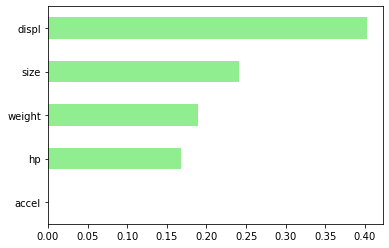

In [28]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

The results show that, according to rf, displ, size, weight and hp are the most predictive features.

#### Random Forests Hyperparameters

In addition to the hyperparameters of the CARTs forming random forests, the ensemble itself is characterized by other hyperparameters such as the number of estimators, whether it uses bootstraping or not and so on.

#### Tuning is expensive

As a note, hyperparameter tuning is computationally expensive and may sometimes lead only to very slight improvement of a model's performance. For this reason, it is desired to weigh the impact of tuning on the pipeline of your data analysis project as a whole in order to understand if it is worth pursuing.

#### Inspecting RF Hyperparameters in sklearn

To inspect the hyperparameters of a RandomForestRegressor, first, import RandomForestRegressor from sklearn.ensemble and then instantiate a RandomForestRegressor rf .

In [29]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

#### Inspecting RF Hyperparameters in sklearn

The hyperparameters of rf along with their default values can be accessed by calling rf's dot-get_params() method.

In [30]:
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In the following, we'll be optimizing n_estimators, max_depth, min_samples_leaf and max_features. 

### GridSearchCV in sklearn (auto dataset)

We'll perform grid-search cross-validation on the auto-dataset which is already loaded and split into 80%-train and 20%-test. 

First import mean_squared_error as MSE from sklearn.metrics and GridSearchCV from sklearn.model_selection. 

Then, define a dictionary called params_rf containing the grid of hyperparameters. 

Finally, instantiate a GridSearchCV object called grid_rf and pass the parameters rf as estimator, params_rf as param_grid. Also set cv to 3 to perform 3-fold cross-validation. 

In addition, set scoring to neg_mean_squared_error in order to use negative mean squared error as a metric. 

Note that the parameter verbose controls verbosity; the higher its value, the more messages are printed during fitting.

In [31]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

In [32]:
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500],'max_depth': [4, 6, 8],'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

In [33]:
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

In [34]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

#### Extracting the best hyperparameters

You can extract rf's best hyperparameters by getting the attribute best_params_ from grid_rf. 

#### Evaluating the best model performance

You can also extract the best model from rf. This enables you to predict the test set labels and evaluate the test-set RMSE. 

In [35]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


In [36]:
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.83


The output shows a result of 3.83. If you would have trained an untuned model, the RMSE would be 3.98.

### Gradient Boosting (GB)

Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions.

In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels. 

#### Gradient Boosted Trees for Regression: Training

To understand how gradient boosted trees are trained for a regression problem, take an assumption. 

Suppose, The ensemble consists of N trees. Tree 1 is trained using the features matrix X and the dataset labels y. The predictions labeled y1 are used to determine the training set residual errors r. where, r = y-y1

Tree2 is then trained using the features matrix X and the residual errors r of Tree1 as labels. The predicted residuals r1 are then used to determine the residuals of residuals which are labeled r2. where, r2 = r-r1 

This process is repeated until all of the N trees forming the ensemble are trained.

#### Shrinkage

An important parameter used in training gradient boosted trees is shrinkage. In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate which is a number between 0 and 1. 

Similarly to AdaBoost, there's a trade-off between and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

In [37]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=25, max_features=0.6,max_depth=1, random_state=SEED)

In [56]:
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, max_features=0.6, n_estimators=25,
                          random_state=1)

In [57]:
# Predict the test set labels
y_pred = gbt.predict(X_test)

In [58]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.69


### Gradient Boosting: Cons

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features.

####  Stochastic Gradient Boosting

To mitigate these effects, you can use an algorithm known as stochastic gradient boosting. 

In stochastic gradient boosting, each CART is trained on a random subset of the training data. This subset is sampled without replacement. 

Furthermore, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.

#### Stochastic Gradient Boosting: Training

First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. 

The sampled data is then used for training a tree. However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose. 

Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble. 

This procedure is repeated sequentially until all the trees in the ensemble are trained. The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.


#### Stochastic Gradient Boosting in sklearn (auto dataset)

We'll be dealing with the auto-dataset which is already loaded. 

Now define a stochastic-gradient-boosting-regressor named sgbt consisting of 300 decision-stumps. This can be done by setting the parameters max_depth to 1 and n_estimators to 300. 

Set the parameter subsample  to 0.8 in order for each tree to sample 80% of the data for training. 

Finally, Set the parameter max_features was set to o.8 so that each tree uses 80% of available features to perform the best-split. 

Once done, fit sgbt to the training set and predict the test set labels.

In [59]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.6, n_estimators=25, random_state=1)

In [60]:
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, max_features=0.6, n_estimators=25,
                          random_state=1, subsample=0.8)

In [61]:
# Predict the test set labels
y_pred = sgbt.predict(X_test)

In [62]:
# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.63
